In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import os
import rasterio as rio
import rioxarray as rxr
import contextily as ctx

In [2]:
seattle_gdf = gpd.read_file('https://raw.githubusercontent.com/seattleflu/seattle-geojson/master/seattle_geojsons/2016_seattle_city.geojson', engine='pyogrio')

In [3]:
#read in the data with paths
dtm_53 ='DTM_data/king_county_2016_dtm_53.tif'
dtm_54 = 'DTM_data/king_county_2016_dtm_54.tif'
dtm_66 = 'DTM_data/king_county_2016_dtm_66.tif'
dtm_67 ='DTM_data/king_county_2016_dtm_67.tif'

dtm_53_data = rxr.open_rasterio(dtm_53, chunks='auto').squeeze()
dtm_54_data = rxr.open_rasterio(dtm_54, chunks='auto').squeeze()
dtm_66_data = rxr.open_rasterio(dtm_66, chunks='auto').squeeze()
dtm_67_data = rxr.open_rasterio(dtm_67, chunks='auto').squeeze()

dtm_53_coarsen_da = dtm_53_data.coarsen(x=10, y=10, boundary='trim').mean()
dtm_54_coarsen_da = dtm_54_data.coarsen(x=10, y=10, boundary='trim').mean()
dtm_66_coarsen_da = dtm_66_data.coarsen(x=10, y=10, boundary='trim').mean()
dtm_67_coarsen_da = dtm_67_data.coarsen(x=10, y=10, boundary='trim').mean()

In [4]:
seattle_gdf_reproj = seattle_gdf.to_crs(dtm_67_coarsen_da.rio.crs)

In [5]:
dtm_53_clipped = dtm_53_coarsen_da.rio.clip(seattle_gdf_reproj.geometry, seattle_gdf_reproj.crs, drop=True)
dtm_54_clipped = dtm_54_coarsen_da.rio.clip(seattle_gdf_reproj.geometry, seattle_gdf_reproj.crs, drop=True)
dtm_66_clipped = dtm_66_coarsen_da.rio.clip(seattle_gdf_reproj.geometry, seattle_gdf_reproj.crs, drop=True)
dtm_67_clipped = dtm_67_coarsen_da.rio.clip(seattle_gdf_reproj.geometry, seattle_gdf_reproj.crs, drop=True)

In [6]:
dtm_53_clipped = dtm_53_clipped.where(dtm_53_clipped != dtm_53_clipped.rio.nodata)
dtm_54_clipped = dtm_54_clipped.where(dtm_54_clipped != dtm_54_clipped.rio.nodata)
dtm_66_clipped = dtm_66_clipped.where(dtm_66_clipped != dtm_66_clipped.rio.nodata)
dtm_67_clipped = dtm_67_clipped.where(dtm_67_clipped != dtm_67_clipped.rio.nodata)

/opt/conda/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


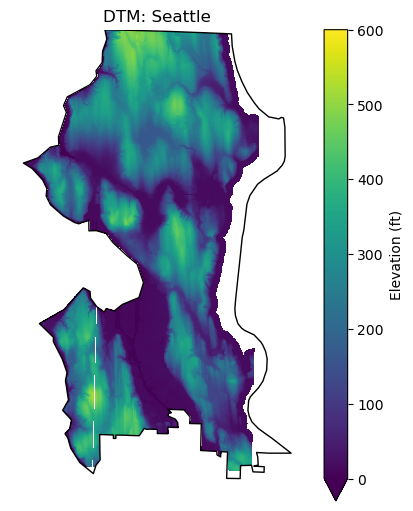

In [7]:
f,ax=plt.subplots(1,1, figsize=(5, 5), layout='constrained')

dtm_66_clipped.plot.imshow(ax=ax,vmin=0, vmax=600, cbar_kwargs={'label':'Elevation (ft)'}, robust=True)
dtm_67_clipped.plot.imshow(ax=ax,vmin=0, vmax=600, add_colorbar=False, robust=True)
dtm_54_clipped.plot.imshow(ax=ax,vmin=0, vmax=600, add_colorbar=False, robust=True)
dtm_53_clipped.plot.imshow(ax=ax,vmin=0, vmax=600, add_colorbar=False, robust=True)

#ctx.add_basemap(ax=ax, crs=seattle_gdf_reproj.crs, source=ctx.providers.OpenStreetMap.Mapnik)
seattle_gdf_reproj.plot(ax=ax, facecolor='none')

ax.set_title('DTM: Seattle')
ax.set_axis_off()

In [8]:
'''
import seaborn
f, ax = plt.subplots(figsize=(10,6))
x = seattle_gdf_reproj.geometry.centroid.x
y = seattle_gdf_reproj.geometry.centroid.y

seaborn.kdeplot(data=pplant_gdf_aea_lite, x=x, y=y, fill=True, cbar=True, cmap='inferno')
states_pplant_merge.plot(ax=ax, facecolor='none', edgecolor='gray')
'''

"\nimport seaborn\nf, ax = plt.subplots(figsize=(10,6))\nx = seattle_gdf_reproj.geometry.centroid.x\ny = seattle_gdf_reproj.geometry.centroid.y\n\nseaborn.kdeplot(data=pplant_gdf_aea_lite, x=x, y=y, fill=True, cbar=True, cmap='inferno')\nstates_pplant_merge.plot(ax=ax, facecolor='none', edgecolor='gray')\n"